# Importing Libraries

In [5]:
#Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import warnings
warnings.filterwarnings("ignore")

# Set Options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline


KeyboardInterrupt: 

# Loading the Dataset

In [1]:
# Uploading saved dataframe csv file from google drive
! gdown --id 1cfNXnd6oMsqb0gH-yn54Rtaf7VgCsDSX

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
%%time
# Load Data
df   = pd.read_csv('./df_1.csv')

NameError: name 'pd' is not defined

In [ ]:
df.head()

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card2_missing_flag,card3_missing_flag,card4_missing_flag,card5_missing_flag,card6_missing_flag,addr1_missing_flag,addr2_missing_flag,dist1_missing_flag,dist2_missing_flag,P_emaildomain_missing_flag,R_emaildomain_missing_flag,D1_missing_flag,D2_missing_flag,D3_missing_flag,D4_missing_flag,D5_missing_flag,D6_missing_flag,D7_missing_flag,D8_missing_flag,D9_missing_flag,D10_missing_flag,D11_missing_flag,D12_missing_flag,D13_missing_flag,D14_missing_flag,D15_missing_flag,M1_missing_flag,M2_missing_flag,M3_missing_flag,M4_missing_flag,M5_missing_flag,M6_missing_flag,M7_missing_flag,M8_missing_flag,M9_missing_flag,V1_missing_flag,V2_missing_flag,V3_missing_flag,V4_missing_flag,V5_missing_flag,V6_missing_flag,V7_missing_flag,V8_missing_flag,V9_missing_flag,V10_missing_flag,V11_missing_flag,V12_missing_flag,V13_missing_flag,V14_missing_flag,V15_missing_flag,V16_missing_flag,V17_missing_flag,V18_missing_flag,V19_missing_flag,V20_missing_flag,V21_missing_flag,V22_missing_flag,V23_missing_flag,V24_missing_flag,V25_missing_flag,V26_missing_flag,V27_missing_flag,V28_missing_flag,V29_missing_flag,V30_missing_flag,V31_missing_flag,V32_missing_flag,V33_missing_flag,V34_missing_flag,V35_missing_flag,V36_missing_flag,V37_missing_flag,V38_missing_flag,V39_missing_flag,V40_missing_flag,V41_missing_flag,V42_missing_flag,V43_missing_flag,V44_missing_flag,V45_missing_flag,V46_missing_flag,V47_missing_flag,V48_missing_flag,V49_missing_flag,V50_missing_flag,V51_missing_flag,V52_missing_flag,V53_missing_flag,V54_missing_flag,V55_missing_flag,V56_missing_flag,V57_missing_flag,V58_missing_flag,V59_missing_flag,V60_missing_flag,V61_missing_flag,V62_missing_flag,V63_missing_flag,V64_missing_flag,V65_missing_flag,V66_missing_flag,V67_missing_flag,V68_missing_flag,V69_missing_flag,V70_missing_flag,V71_missing_flag,V72_missing_flag,V73_missing_flag,V74_missing_flag,V75_missing_flag,V76_missing_flag,V77_missing_flag,V78_missing_flag,V79_missing_flag,V80_missing_flag,V81_missing_flag,V82_missing_flag,V83_missing_flag,V84_missing_flag,V85_missing_flag,V86_missing_flag,V87_missing_flag,V88_missing_flag,V89_missing_flag,V90_missing_flag,V91_missing_flag,V92_missing_flag,V93_missing_flag,V94_missing_flag,V95_missing_flag,V96_missing_flag,V97_missing_flag,V98_missing_flag,V99_missing_flag,V100_missing_flag,V101_missing_flag,V102_missing_flag,V103_missing_flag,V104_missing_flag,V105_missing_flag,V106_missing_flag,V107_missing_flag,V108_missing_flag,V109_missing_flag,V110_missing_flag,V111_missing_flag,V112_missing_flag,V113_missing_flag,V114_missing_flag,V115_missing_flag,V116_missing_flag,V117_missing_flag,V118_missing_flag,V119_missing_flag,V120_missing_flag,V121_missing_flag,V122_missing_flag,V123_missing_flag,V124_missing_flag,V125_missing_flag,V126_missing_flag,V127_missing_flag,V128_missing_flag,V129_missing_flag,V130_missing_flag,V131_missing_flag,V132_missing_flag,V133_missing_flag,V134_missing_flag,...,V169_missing_flag,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_missing_flag,V

In [ ]:
# Reduce the number of rows
df = df.sample(frac=0.3, random_state=42)

# Check the shape of the reduced DataFrame
df.shape

(177162, 534)

# Model Building



In [ ]:
# Split the y variable series and X variables dataset
X = df.drop(['isFraud'],axis=1)
y = df.isFraud.astype(bool)

## Train-Test Split

Split the dataset into train set and test set. Train set will be used to train the model. Test set will be used to check the performance of model

In [ ]:
# Split the dataset into the training set and test set
from   sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(124013, 533) (124013,)
(53149, 533) (53149,)


## Handling Missing Values

In [ ]:
from sklearn.impute import SimpleImputer

# replace inf
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Impute
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_train_imputed.head()

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card2_missing_flag,card3_missing_flag,card4_missing_flag,card5_missing_flag,card6_missing_flag,addr1_missing_flag,addr2_missing_flag,dist1_missing_flag,dist2_missing_flag,P_emaildomain_missing_flag,R_emaildomain_missing_flag,D1_missing_flag,D2_missing_flag,D3_missing_flag,D4_missing_flag,D5_missing_flag,D6_missing_flag,D7_missing_flag,D8_missing_flag,D9_missing_flag,D10_missing_flag,D11_missing_flag,D12_missing_flag,D13_missing_flag,D14_missing_flag,D15_missing_flag,M1_missing_flag,M2_missing_flag,M3_missing_flag,M4_missing_flag,M5_missing_flag,M6_missing_flag,M7_missing_flag,M8_missing_flag,M9_missing_flag,V1_missing_flag,V2_missing_flag,V3_missing_flag,V4_missing_flag,V5_missing_flag,V6_missing_flag,V7_missing_flag,V8_missing_flag,V9_missing_flag,V10_missing_flag,V11_missing_flag,V12_missing_flag,V13_missing_flag,V14_missing_flag,V15_missing_flag,V16_missing_flag,V17_missing_flag,V18_missing_flag,V19_missing_flag,V20_missing_flag,V21_missing_flag,V22_missing_flag,V23_missing_flag,V24_missing_flag,V25_missing_flag,V26_missing_flag,V27_missing_flag,V28_missing_flag,V29_missing_flag,V30_missing_flag,V31_missing_flag,V32_missing_flag,V33_missing_flag,V34_missing_flag,V35_missing_flag,V36_missing_flag,V37_missing_flag,V38_missing_flag,V39_missing_flag,V40_missing_flag,V41_missing_flag,V42_missing_flag,V43_missing_flag,V44_missing_flag,V45_missing_flag,V46_missing_flag,V47_missing_flag,V48_missing_flag,V49_missing_flag,V50_missing_flag,V51_missing_flag,V52_missing_flag,V53_missing_flag,V54_missing_flag,V55_missing_flag,V56_missing_flag,V57_missing_flag,V58_missing_flag,V59_missing_flag,V60_missing_flag,V61_missing_flag,V62_missing_flag,V63_missing_flag,V64_missing_flag,V65_missing_flag,V66_missing_flag,V67_missing_flag,V68_missing_flag,V69_missing_flag,V70_missing_flag,V71_missing_flag,V72_missing_flag,V73_missing_flag,V74_missing_flag,V75_missing_flag,V76_missing_flag,V77_missing_flag,V78_missing_flag,V79_missing_flag,V80_missing_flag,V81_missing_flag,V82_missing_flag,V83_missing_flag,V84_missing_flag,V85_missing_flag,V86_missing_flag,V87_missing_flag,V88_missing_flag,V89_missing_flag,V90_missing_flag,V91_missing_flag,V92_missing_flag,V93_missing_flag,V94_missing_flag,V95_missing_flag,V96_missing_flag,V97_missing_flag,V98_missing_flag,V99_missing_flag,V100_missing_flag,V101_missing_flag,V102_missing_flag,V103_missing_flag,V104_missing_flag,V105_missing_flag,V106_missing_flag,V107_missing_flag,V108_missing_flag,V109_missing_flag,V110_missing_flag,V111_missing_flag,V112_missing_flag,V113_missing_flag,V114_missing_flag,V115_missing_flag,V116_missing_flag,V117_missing_flag,V118_missing_flag,V119_missing_flag,V120_missing_flag,V121_missing_flag,V122_missing_flag,V123_missing_flag,V124_missing_flag,V125_missing_flag,V126_missing_flag,V127_missing_flag,V128_missing_flag,V129_missing_flag,V130_missing_flag,V131_missing_flag,V132_missing_flag,V133_missing_flag,V134_missing_flag,V135_missing_flag,...,V169_missing_flag,V170_missing_flag,V171_missing_flag,V172_missing_flag,V173_missing_flag,V174_missing_flag,V175_missing_flag,V176_missing_flag,V177_missing_flag,V178_missing_flag,V179_missing_flag,V180_missing_flag,V181_missing_flag,V182_missing_flag,V183_missing_flag,V184_missing_flag,V185_missing_flag,V186_missing_flag,V187_missing_flag,V188_missing_flag,V189_missing_flag,V190_missing_flag,V191_missing_flag,V192_missing_flag,V193_missing_flag,V194_missing_flag,V195_missing_flag,V196_missing_flag,V197_missing_flag,V198_missing_flag,V199_missing_flag,V200_missing_flag,V201_missing_flag,V202_missing_flag,V203_missing_flag,V204_miss

In [ ]:
# Impute X_Test before predicting
X_test_imputed = imputer.transform(X_test)

## Feature Scaling

In [ ]:
# Normalize the data using sklearn StandardScaler
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(X_train_imputed)
print(scaler)

StandardScaler()


In [ ]:
# Transform and display the training data
X_standardized_train = scaler.transform(X_train_imputed)
train_data = pd.DataFrame(X_standardized_train)

In [ ]:
X_standardized_test = scaler.transform(X_test_imputed)
test_data = pd.DataFrame(X_standardized_test)

## Defining the ANN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_dim))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

## ANN Model Architecture Summary

In [ ]:
model = build_model((X_standardized_train.shape[1],))
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          68,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,233 (309.50 KB)

 Trainable params: 79,233 (309.50 KB)

 Non-trainable params: 0 (0.00 B)

None


## ANN Model Architecture Plot

In [ ]:
!pip install pydot graphviz


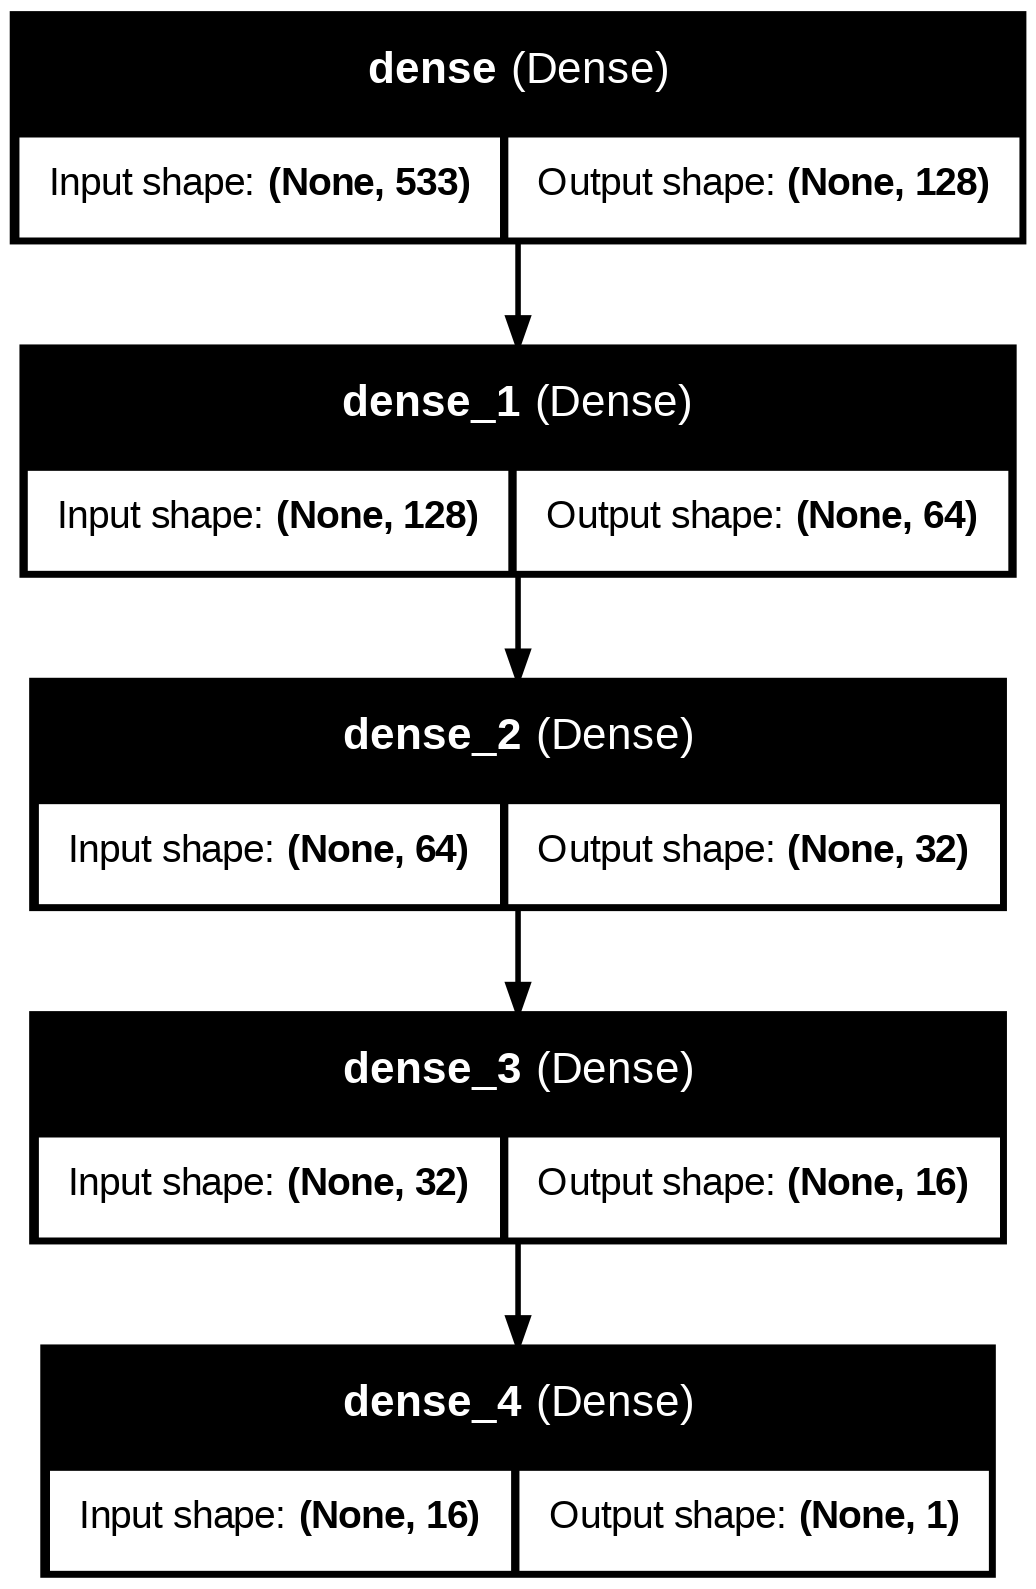

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='ann_model_summary.png', show_shapes=True, show_layer_names=True)


## ANN Model Architecture Graph using Keras Visualizer

In [ ]:
!pip3 install keras-visualizer

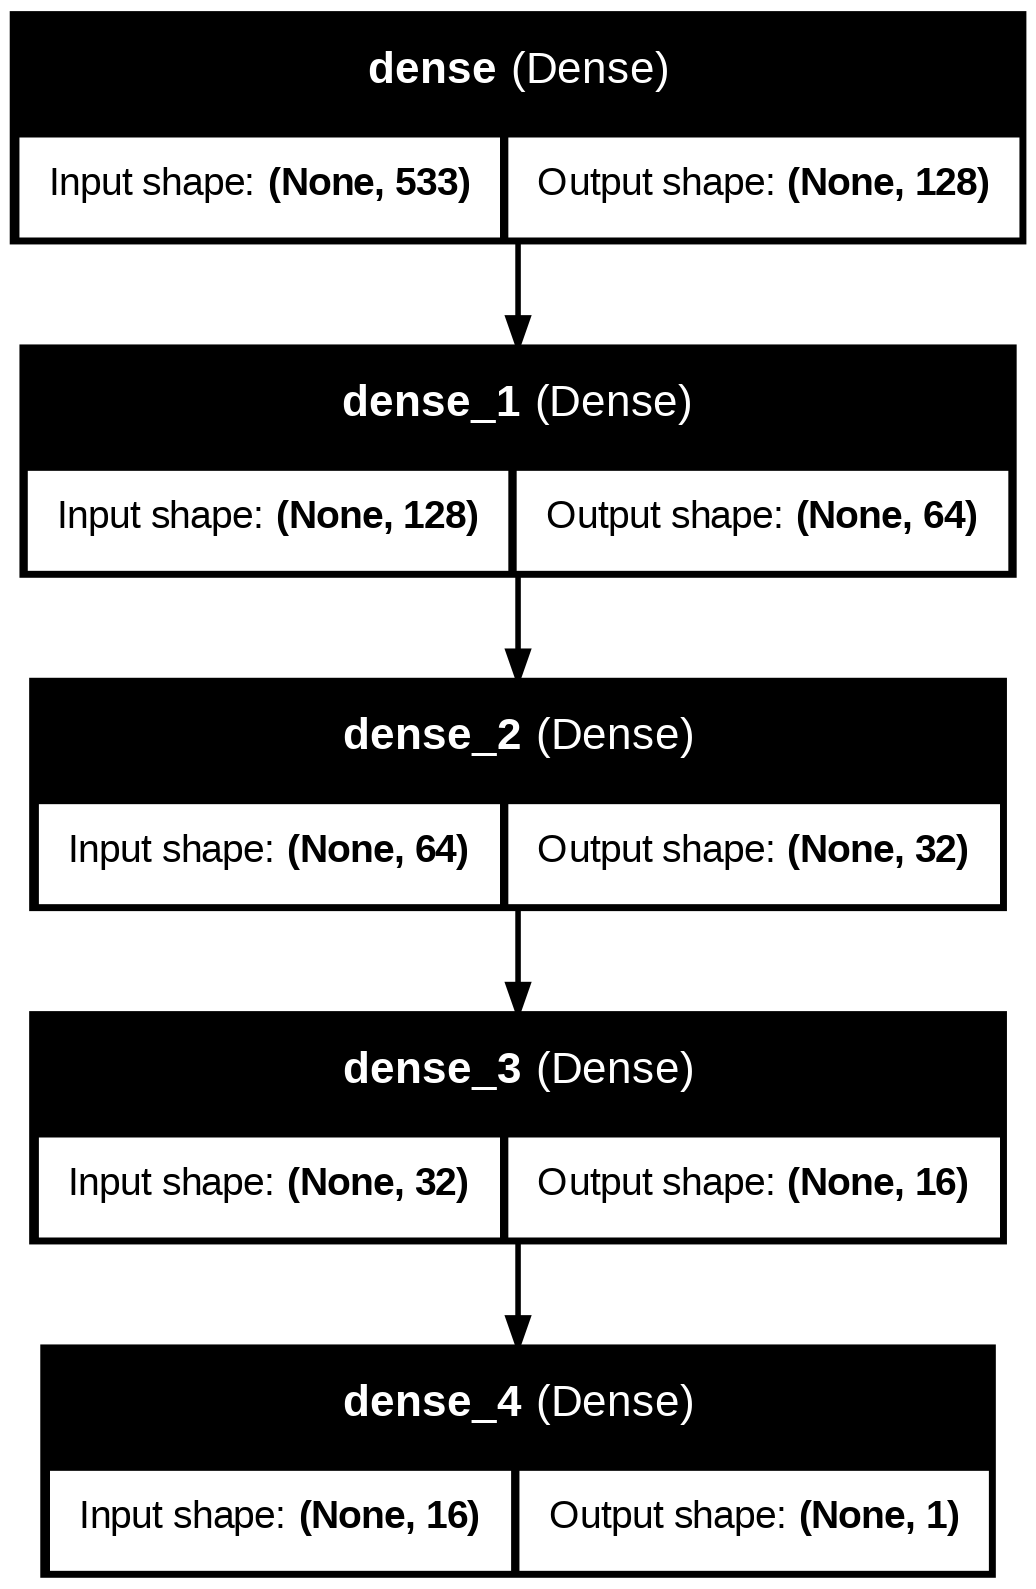

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='ann_model_summary.png', show_shapes=True, show_layer_names=True)

from IPython.display import Image
Image('ann_model_summary.png', width=800, height=600)

## Training the ANN Model

In [ ]:
%%time
model_history = model.fit(X_standardized_train, y_train, validation_data=(X_standardized_test, y_test), epochs= 100)

Epoch 1/100
3876/3876 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.9886 - loss: 0.0352 - val_accuracy: 0.9689 - val_loss: 0.2101
Epoch 2/100
3876/3876 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9876 - loss: 0.0403 - val_accuracy: 0.9696 - val_loss: 0.2143
Epoch 3/100


KeyboardInterrupt: 

In [ ]:
#Model Accuracy Results
print("Results:")
print("---------------------")
scores_train = model.evaluate(X_standardized_train, y_train, verbose= 2)
print("Training Accuracy: %.2f%%\n" % (scores_train[1] * 100))
scores_test = model.evaluate(X_standardized_test, y_test, verbose= 2)
print("Testing Accuracy: %.2f%%\n" % (scores_test[1] * 100))

Results:
---------------------
3876/3876 - 7s - 2ms/step - accuracy: 0.9893 - loss: 0.0331
Training Accuracy: 98.93%

1661/1661 - 5s - 3ms/step - accuracy: 0.9696 - loss: 0.2143
Testing Accuracy: 96.96%



## ANN Model Accuracy on Train and Test Data

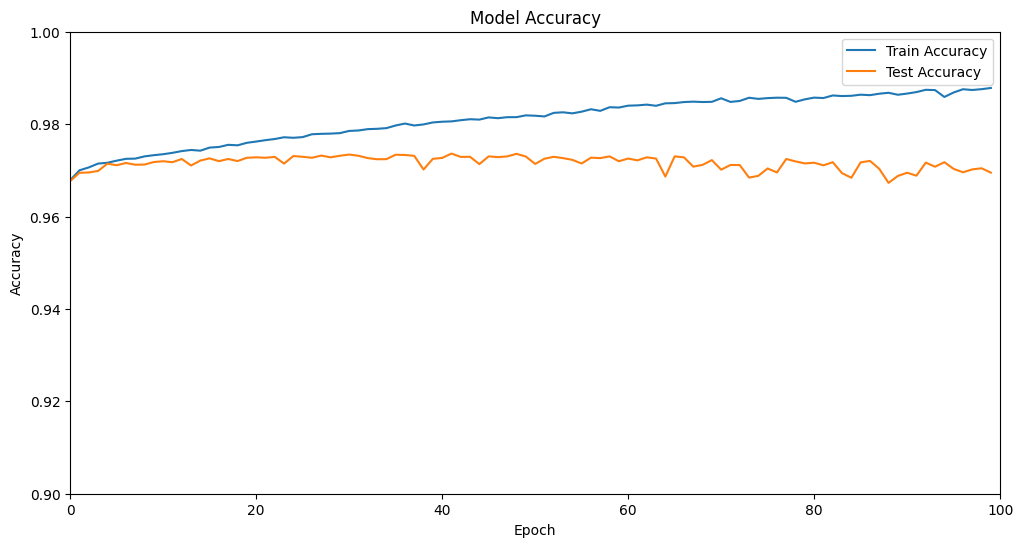

In [ ]:
# summarize history for accuracy
plt.figure(figsize = (12,6))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper right')
plt.xlim(0,100)
plt.ylim(0.90,1.0)
plt.show()

## ANN Model Loss on Train and Test Data

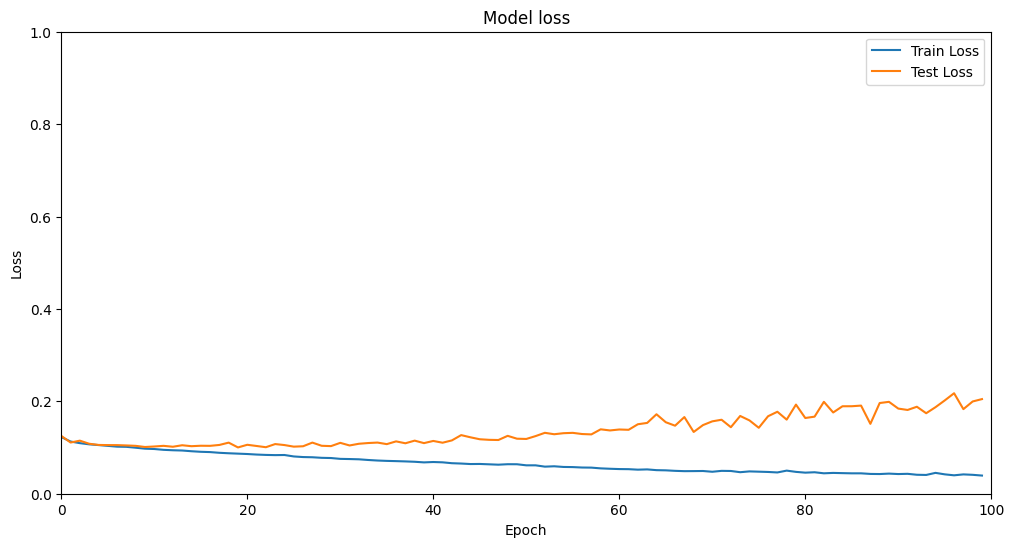

In [ ]:
# summarize history for loss
plt.figure(figsize = (12,6))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlim(0,100)
plt.ylim(0.0,1.0)
plt.show()

In [ ]:
# getting predictions for the validation set
prediction = model.predict(X_standardized_test)

# convert to categorical predictions
y_pred_categorical1 = [1 if pred > 0.5 else 0 for pred in prediction]

1661/1661 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


## Model Evaluation

In [ ]:
!pip install scikit-learn==1.0.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 25.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.26.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
mlxtend 0.23.2 requires scikit-learn>=1.3.1, but you have scikit-learn 1.0.2 which is incompatible.


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("\n Accuracy Score : ",accuracy_score(y_test, y_pred_categorical1))
print('\n')
print("\n AUC - ROC Score : ", roc_auc_score(y_test, y_pred_categorical1))
print('\n')
print("\n Classification Report : \n\n",classification_report(y_test, y_pred_categorical1))
print('\n')
print("\n Confusion Matrix : \n\n",confusion_matrix(y_test, y_pred_categorical1))
print('\n')


 Accuracy Score :  0.9695949124160379



 AUC - ROC Score :  0.7207640671206375



 Classification Report : 

               precision    recall  f1-score   support

       False       0.98      0.99      0.98     51194
        True       0.62      0.45      0.52      1955

    accuracy                           0.97     53149
   macro avg       0.80      0.72      0.75     53149
weighted avg       0.97      0.97      0.97     53149




 Confusion Matrix : 

 [[50649   545]
 [ 1071   884]]




## Confusion Matrix Plot

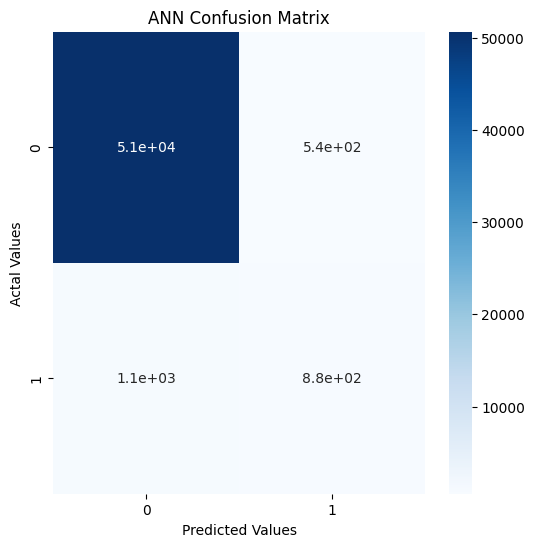

In [ ]:
%matplotlib inline
CM=confusion_matrix(y_test,y_pred_categorical1)
CM_df = pd.DataFrame(CM,index = ['0','1'], columns = ['0','1'])
plt.figure(figsize=(6,6))
sns.heatmap(CM_df, annot=True, cmap="Blues")
plt.title('ANN Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()